In [2]:
import os, shutil
import random
import numpy as np
import pandas as pd
import cv2
import skimage
import matplotlib.pyplot as plt
import skimage.segmentation
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [39]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 128

def get_data(data_dir):
    images = []
    image_labels = []
    
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)  # 0 for PNEUMONIA, 1 for NORMAL
        
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is None:
                    continue  # Skip if image can't be read
                
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                images.append(resized_arr)
                image_labels.append(class_num)
            
            except Exception as e:
                print(f"Error loading image {img}: {e}")
    
    # Convert to NumPy arrays
    images = np.array(images, dtype=np.float32)  # Shape: (N, 128, 128)
    image_labels = np.array(image_labels, dtype=np.int32)  # Shape: (N,)

    return images, image_labels


In [40]:
train_images, train_labels = get_data("./DL/chest_xray/chest_xray/train")
test_images, test_labels = get_data("./DL/chest_xray/chest_xray/test")
val_images, val_labels = get_data("./DL/chest_xray/chest_xray/val")

In [41]:
pneumonia = os.listdir("./DL/chest_xray/chest_xray/train/PNEUMONIA")
penomina_dir = "./DL/chest_xray/chest_xray/train/PNEUMONIA"

In [46]:
print(pneumonia)
print(penomina_dir)

['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg', 'person1003_virus_1685.jpeg', 'person1004_bacteria_2935.jpeg', 'person1004_virus_1686.jpeg', 'person1005_bacteria_2936.jpeg', 'person1005_virus_1688.jpeg', 'person1006_bacteria_2937.jpeg', 'person1007_bacteria_2938.jpeg', 'person1007_virus_1690.jpeg', 'person1008_bacteria_2939.jpeg', 'person1008_virus_1691.jpeg', 'person1009_virus_1694.jpeg', 'person100_virus_184.jpeg', 'person1010_bacteria_2941.jpeg', 'person1010_virus_1695.jpeg', 'person1011_bacteria_2942.jpeg', 'person1012_bacteria_2943.jpeg', 'person1014_bacteria_2945.jpeg', 'person1015_virus_1701.jpeg', 'person1015_virus_1702.jpeg', 'person1016_bacteria_2947.jpeg', 'person1016_virus_1704.jpeg', 'person1017_bacteria_2948.jpeg', 'person1018_bacteria_2949.jpeg', 'person1018_virus_1706.jpeg', 'person1019_bacteria_2950.jpeg', 'person1019_virus_1707.jpeg', 'person1019_virus_17

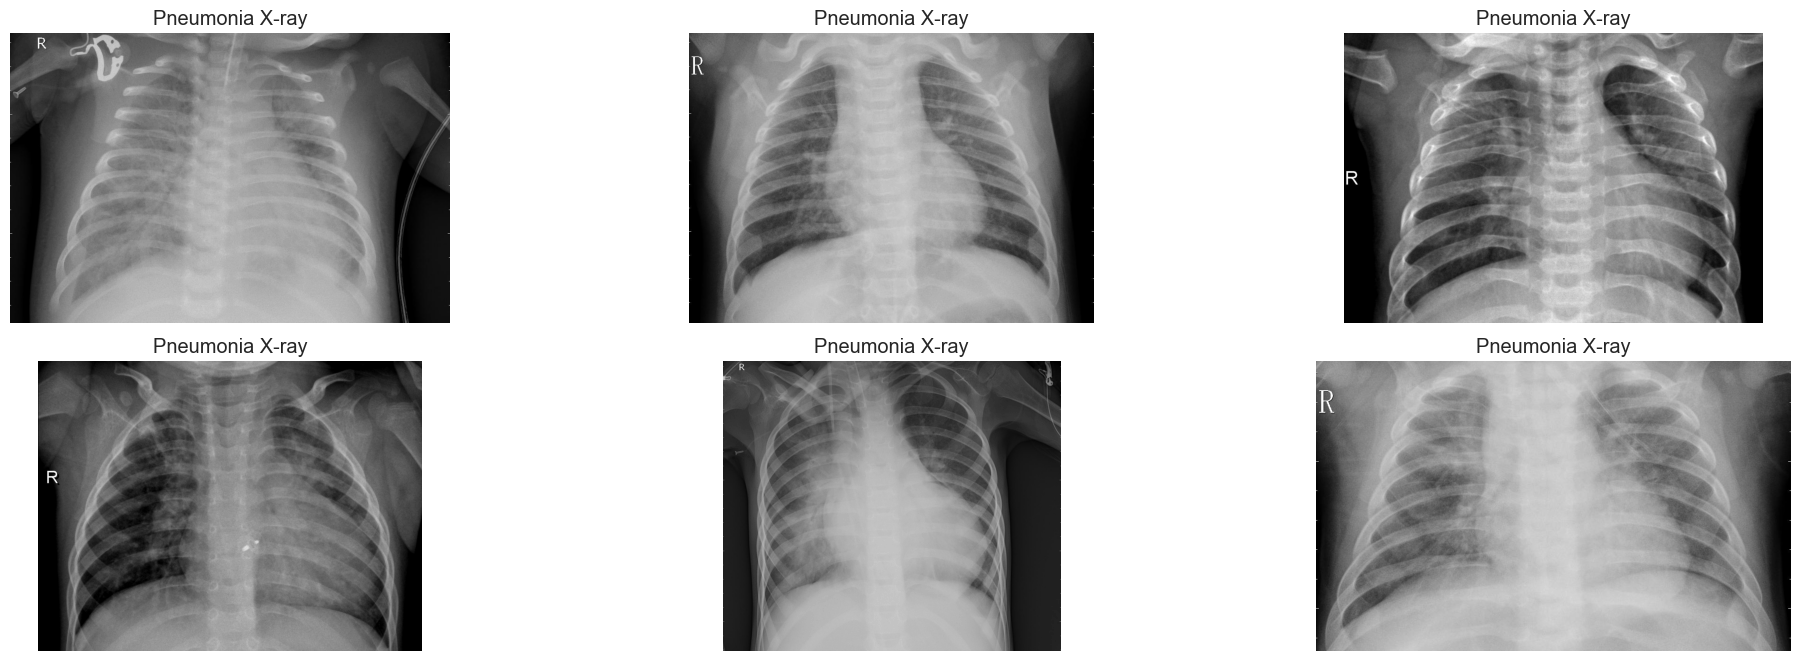

In [48]:
plt.figure(figsize=(20,10))

for i in range(6):
    plt.subplot(3,3, i+1)
    img = plt.imread(os.path.join(penomina_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("Pneumonia X-ray")
plt.tight_layout()
plt.show()

In [49]:
normal = os.listdir("./DL/chest_xray/chest_xray/train/NORMAL")
normal_dir = "./DL/chest_xray/chest_xray/train/NORMAL"

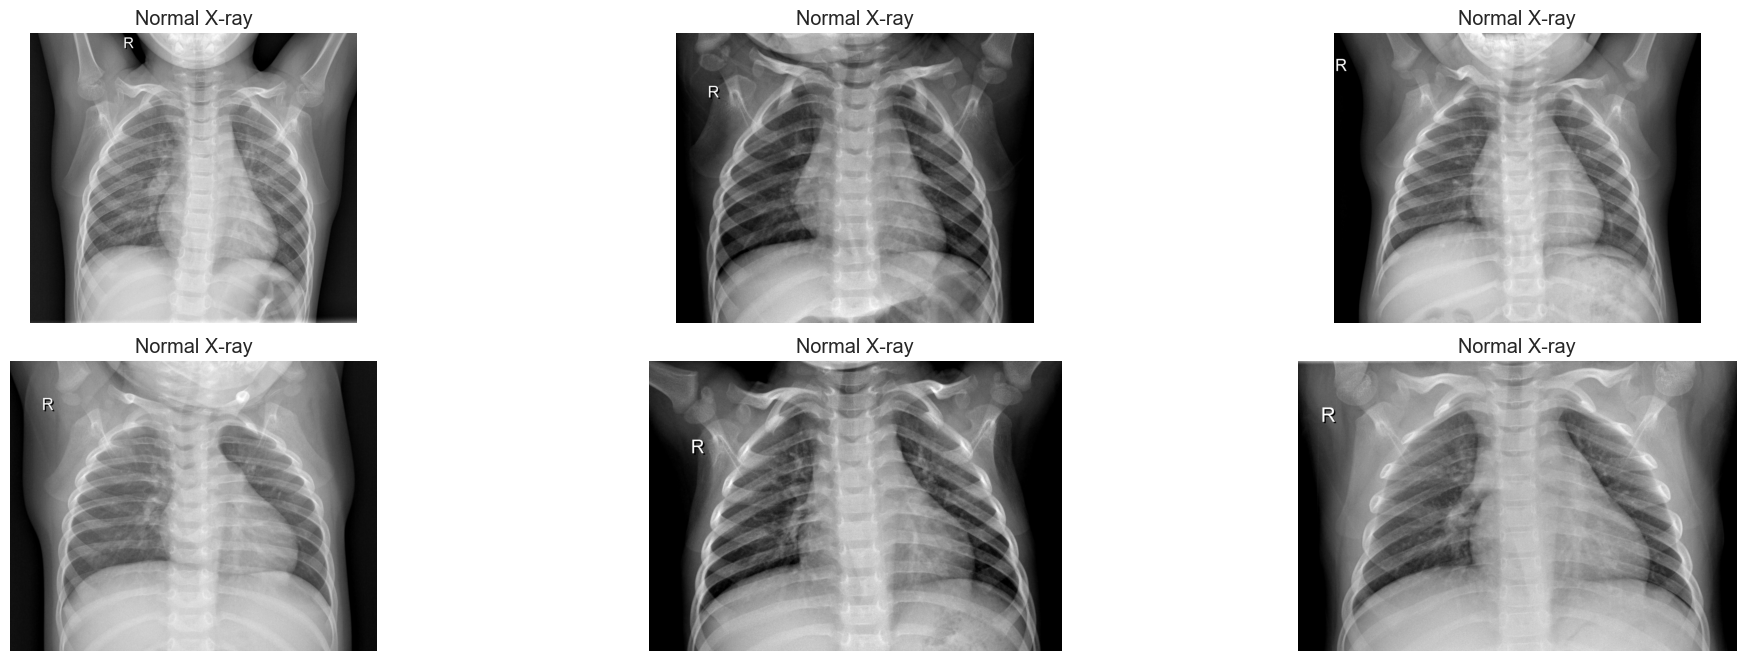

In [51]:
plt.figure(figsize=(20,10))

for i in range(6):
    plt.subplot(3,3, i+1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("Normal X-ray")
plt.tight_layout()
plt.show()

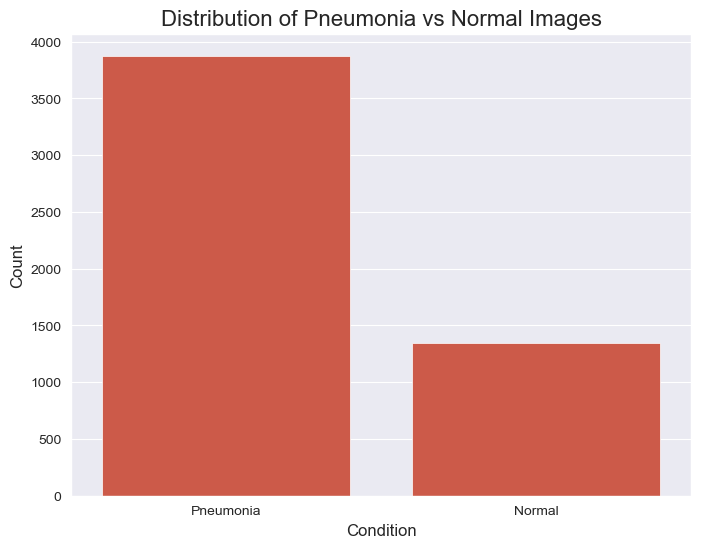

In [54]:
 # Assuming `train_labels` contains the labels (0 for Pneumonia, 1 for Normal)
# Map 0 to 'Pneumonia' and 1 to 'Normal'
labels = ['Pneumonia' if label == 0 else 'Normal' for label in train_labels]

# Convert the list to a pandas Series to avoid the FutureWarning
labels_series = pd.Series(labels)

# Set Seaborn style
sns.set_style('darkgrid')

# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=labels_series)

# Add labels and title to the plot
plt.title('Distribution of Pneumonia vs Normal Images', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Data Augmentation & Resizing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1. / 255, 
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode="nearest")
valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory("chest_xray/chest_xray/train",
                                 batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')
valid_generator = valid_datagen.flow_from_directory("chest_xray/chest_xray/val",
                                 batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')

In [ ]:
class_labels = train_generator.class_indices

In [ ]:
class_labels

In [ ]:
class_name = {value:key for (key, value) in class_labels.items()}

In [ ]:
class_name

In [ ]:
# VGG19 CNN Architecture

In [ ]:
base_model = VGG19(input_shape = (128,128,3),
                     include_top = False,
                     weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
flat = Flatten()(x)


class_1 = Dense(4608, activation = 'relu')(flat)
dropout = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(dropout)
output = Dense(2, activation = 'softmax')(class_2)

model_01 = Model(base_model.inputs, output)
model_01.summary()

In [ ]:
filepath = "model.h5"
es = EarlyStopping(monitor="val_loss", verbose=1, mode="min", patience=4)
cp=ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True, save_weights_only=False,mode="auto", save_freq="epoch")
lrr = ReduceLROnPlateau(monitor="val_accuracy", patience=3, verbose=1, factor=0.5, min_lr=0.0001)

sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum=0, nesterov = True)

model_01.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [ ]:
history_01 = model_01.fit(train_generator, 
            steps_per_epoch=50,
            epochs=1, 
            callbacks=[es, cp, lrr],
            validation_data=valid_generator)

In [ ]:
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model_01.save(filepath = "model_weights/vgg19_model_01.h5", overwrite=True)

In [ ]:
test_generator = test_datagen.flow_from_directory("chest_xray/chest_xray/test",
                                 batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')

In [ ]:
model_01.load_weights("model_weights/vgg19_model_01.h5")

vgg_val_eval_01 = model_01.evaluate(valid_generator)
vgg_test_eval_01 = model_01.evaluate(test_generator)

In [ ]:
print(f"Validation Loss: {vgg_val_eval_01[0]}")
print(f"Validation Accuarcy: {vgg_val_eval_01[1]}")
print(f"Test Loss: {vgg_test_eval_01[0]}")
print(f"Test Accuarcy: {vgg_test_eval_01[1]}")

In [ ]:
# Increamental unfreezing & fine tuning

In [ ]:
base_model = VGG19(include_top=False, input_shape=(128,128,3))
base_model_layer_names = [layer.name for layer in base_model.layers]

x = base_model.output
flat = Flatten()(x)


class_1 = Dense(4608, activation = 'relu')(flat)
dropout = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(dropout)
output = Dense(2, activation = 'softmax')(class_2)

model_02 = Model(base_model.inputs, output)
model_02.load_weights("model_weights/vgg19_model_01.h5")

set_trainable = False
for layer in base_model.layers:
    if layer.name in [ 'block5_conv3','block5_conv4']:
        set_trainable=True
    if set_trainable:
        set_trainable=True
    else:
        set_trainable=False
print(model_02.summary())

In [ ]:
base_model_layer_names

In [ ]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum=0, nesterov = True)

model_02.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [ ]:
history_02 = model_02.fit(train_generator, 
            steps_per_epoch=10,
            epochs=1, 
            callbacks=[es, cp, lrr],
            validation_data=valid_generator)

In [ ]:
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model_02.save(filepath = "model_weights/vgg19_model_02.h5", overwrite=True)

In [ ]:
model_02.load_weights("model_weights/vgg19_model_02.h5")

vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

print(f"Validation Loss: {vgg_val_eval_02[0]}")
print(f"Validation Accuarcy: {vgg_val_eval_02[1]}")
print(f"Test Loss: {vgg_test_eval_02[0]}")
print(f"Test Accuarcy: {vgg_test_eval_02[1]}")

In [ ]:
# Unfreezing and fine tuning the entire network

In [ ]:
base_model = VGG19(include_top=False, input_shape=(128,128,3))

x = base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
dropout = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(dropout)
output = Dense(2, activation = 'softmax')(class_2)

model_03 = Model(base_model.inputs, output)
model_03.load_weights("model_weights/vgg19_model_01.h5")

print(model_03.summary())

In [ ]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum=0, nesterov = True)

model_03.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [ ]:
history_03 = model_02.fit(train_generator, 
            steps_per_epoch=100,
            epochs=1, 
            callbacks=[es, cp, lrr],
            validation_data=valid_generator)

In [ ]:
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model_02.save(filepath = "model_weights/vgg_unfrozen.h5", overwrite=True)